Movie Data Analysis and Visualization

Section 1: Load and Display Datasets

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator
movies_file_path = 'C:/Kodilla/movie_database/tmdb_movies.csv'
genres_file_path = 'C:/Kodilla/movie_database/tmdb_genres.csv'
movies_df = pd.read_csv(movies_file_path)
genres_df = pd.read_csv(genres_file_path)

# Display the first few rows of each dataframe
movies_df

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [155]:
genres_df

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


Section 2: Analyze and Filter Movies Based on Vote Count

In [176]:
# Calculate the 3rd quartile for vote count
third_quartile_vote_count = movies_df['vote_count'].quantile(0.75)

# Filter movies with vote count greater than the 3rd quartile
high_vote_count_movies = movies_df[movies_df['vote_count'] > third_quartile_vote_count]

# Select the top 10 highest-rated movies
top_10_highest_rated_movies = high_vote_count_movies.nlargest(10, 'vote_average')
print("\nTop 10 Highest-Rated Movies:")
top_10_highest_rated_movies[['title', 'vote_average', 'vote_count']]


Top 10 Highest-Rated Movies:


,title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
662,Fight Club,8.3,9413
1818,Schindler's List,8.3,4329
2294,Spirited Away,8.3,3840
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
3865,Whiplash,8.3,4254
65,The Dark Knight,8.2,12002
690,The Green Mile,8.2,4048


Section 3: Filter Movies Released Between 2010 and 2016 and Analyze Budget and Revenue

In [178]:
# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Filter movies released between 2010 and 2016
movies_2010_2016 = movies_df[(movies_df['release_date'].dt.year >= 2010) & (movies_df['release_date'].dt.year <= 2016)]

# Group by release year and calculate the average budget and revenue
average_budget_revenue = movies_2010_2016.groupby(movies_2010_2016['release_date'].dt.year).agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Rename columns for clarity
average_budget_revenue.columns = ['year', 'average_budget', 'average_revenue']

# Round the values to the nearest whole number
average_budget_revenue['average_budget'] = average_budget_revenue['average_budget'].round()
average_budget_revenue['average_revenue'] = average_budget_revenue['average_revenue'].round()
print("\nAverage Budget and Revenue (2010-2016):")
average_budget_revenue


Average Budget and Revenue (2010-2016):


,year,average_budget,average_revenue
0,2010,34495411.0,90438110.0
1,2011,34772320.0,92004131.0
2,2012,34922032.0,116065915.0
3,2013,35523294.0,101348456.0
4,2014,30959888.0,101346599.0
5,2015,31132164.0,105439927.0
6,2016,45703269.0,139049586.0


Section 4: Visualize Average Budget and Revenue (2010-2016)

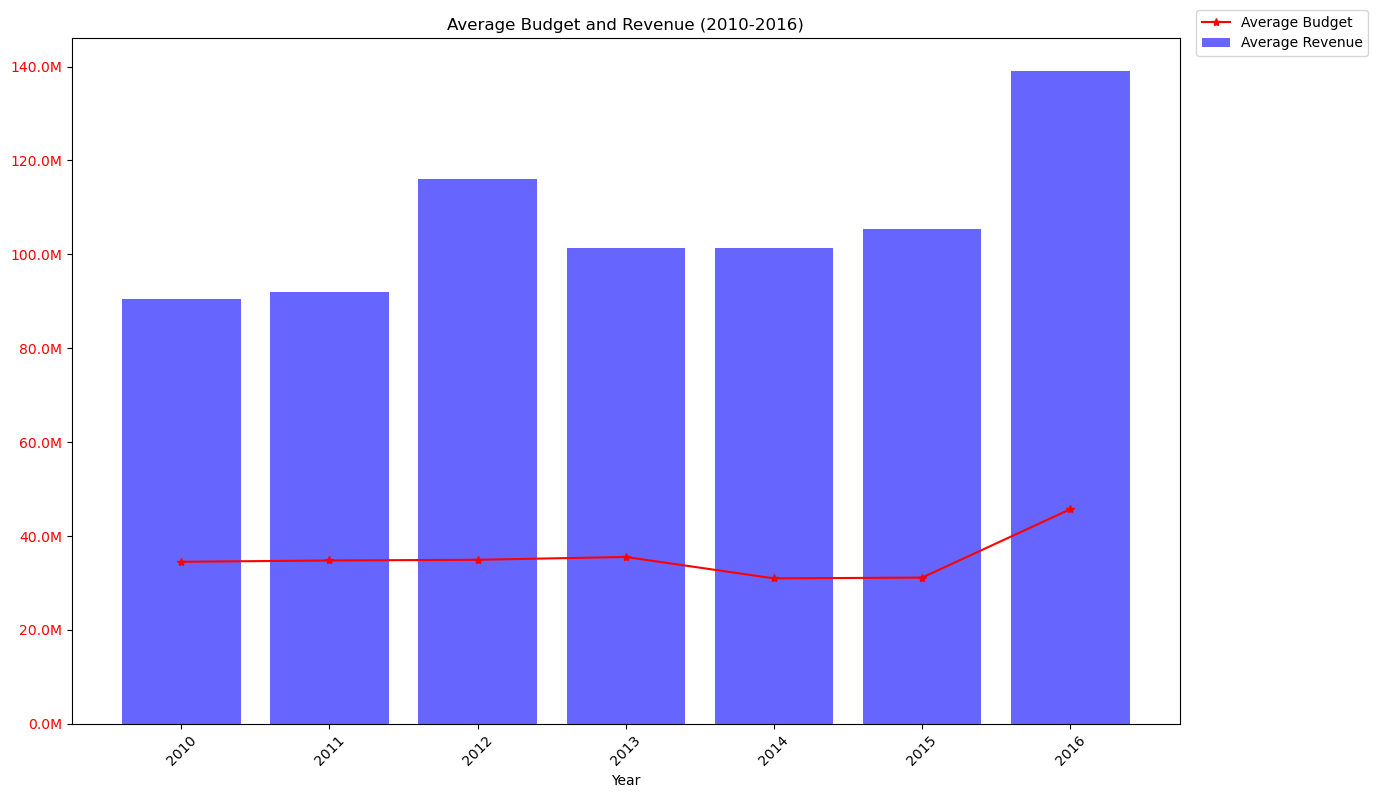

In [194]:
# Define the formatter function
def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = plt.FuncFormatter(million)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting the average revenue as a bar plot
ax1.bar(average_budget_revenue['year'], average_budget_revenue['average_revenue'], color='blue', alpha=0.6, label='Average Revenue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='b')

# Applying the formatter to the revenue axis
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_locator(MultipleLocator(2e7))  # Set major locator to display values as 0, 2, 4, 6, 8, 10, 12, 14 million

# Plotting the average budget as a line plot on the same y-axis
ax1.plot(average_budget_revenue['year'], average_budget_revenue['average_budget'], color='r', marker='*', label='Average Budget')
ax1.tick_params(axis='y', labelcolor='r')

# Applying the formatter to the budget axis using ScalarFormatter
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.yaxis.get_major_formatter().set_scientific(False)
ax2.yaxis.set_major_locator(MultipleLocator(1e7))  # Set major locator to display values as 0, 10, 20, 30, 40, 50 million

# Adding title 
plt.title('Average Budget and Revenue (2010-2016)')

# Adding the legend outside of the plot
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Formatting the x-axis
ax1.set_xticks(average_budget_revenue['year'])
ax1.set_xticklabels(average_budget_revenue['year'], rotation=45)

plt.tight_layout()
plt.show()

Section 5: Merge Movies DataFrame with Genres DataFrame

In [180]:
# Merging the movies dataframe with the genres dataframe based on the genre_id
merged_df = pd.merge(movies_df, genres_df, how='left', left_on='genre_id', right_on='Unnamed: 0')

# Renaming columns for better understanding
merged_df = merged_df.rename(columns={'genres': 'genre_name'})

# Displaying the first few rows of the merged dataframe to verify the result
merged_df[['title', 'genre_id', 'genre_name']].head()

,title,genre_id,genre_name
0,Avatar,28.0,Action
1,Pirates of the Caribbean: At World's End,12.0,Adventure
2,Spectre,28.0,Action
3,The Dark Knight Rises,28.0,Action
4,John Carter,28.0,Action


Section 6: Analyze the Most Common Genre

In [181]:
# Grouping the merged dataframe by genre_name and counting the number of movies in each genre
genre_counts = merged_df['genre_name'].value_counts()

# Getting the most common genre and its count
most_common_genre = genre_counts.idxmax()
most_common_genre_count = genre_counts.max()

most_common_genre, most_common_genre_count

('Drama', 1207)

Section 7: Analyze Genre with Longest Average Runtime

In [182]:
# Grouping the merged dataframe by genre_name and calculating the mean runtime for each genre
average_runtime_by_genre = merged_df.groupby('genre_name')['runtime'].mean()

# Finding the genre with the longest average runtime
longest_runtime_genre = average_runtime_by_genre.idxmax()
longest_runtime = average_runtime_by_genre.max()

longest_runtime_genre, longest_runtime

('History', 133.96)

Section 8: Visualize Runtime Distribution for Genre with Longest Average Runtime

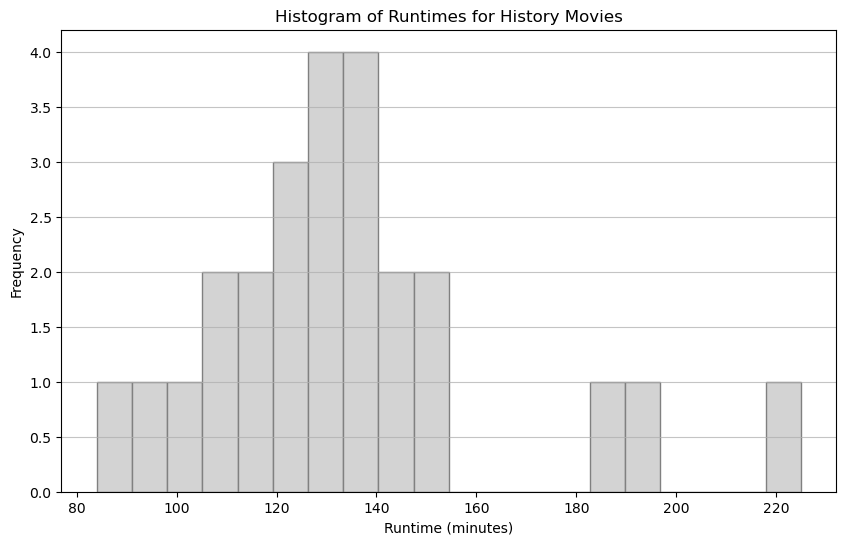

In [187]:
# Filtering the movies of the genre with the longest average runtime
history_movies = merged_df[merged_df['genre_name'] == 'History']

# Plotting the histogram of the runtimes for the History genre
plt.figure(figsize=(10, 6))
plt.hist(history_movies['runtime'].dropna(), bins=20, color='lightgrey', edgecolor='grey')
plt.title('Histogram of Runtimes for History Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()